In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt
import hypernetx as hnx
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score




In [2]:
DATATRAIN_SOURCE_FILE="diabetes csv - Copy.csv"
df = pd.read_csv(DATATRAIN_SOURCE_FILE)
df.head()



,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Diabetes_binary
0,1,1,1,1,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0
2,1,1,1,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0
4,1,1,1,0,0,0,1,0,0


In [3]:
y = df['Diabetes_binary'].to_numpy()

# Separate other features
X = df.drop('Diabetes_binary', axis=1).to_numpy()
features = [X[idx] for idx in X]

In [6]:
import itertools
import numpy as np
count=0


def joint_entropy(feature_set):
    # calculate joint probability
    prob = np.prod([df[f].value_counts(normalize=True) for f in feature_set], axis=0)

    # calculate joint entropy
    entropy = -np.sum(prob * np.log2(prob))
    return entropy

# calculate joint entropy for each feature
for f in features:
    j_entropy = joint_entropy([f])
    print(f"Joint entropy of {f}: {j_entropy:.4f}")

# calculate joint entropy for combinations of features
for m in range(2, len(features) + 1):
    for feature_set in itertools.combinations(features, m):
        j_entropy = joint_entropy(feature_set)
        feature_set_str = ", ".join(feature_set)
        print(f"Joint entropy of ({feature_set_str}): {j_entropy:.4f}")
        count+=1
print(f"Total number of feature combinations: {count}")

Joint entropy of HighBP: 0.9842
Joint entropy of HighChol: 0.9847
Joint entropy of CholCheck: 0.2020
Joint entropy of Smoker: 0.9935
Joint entropy of Stroke: 0.2513
Joint entropy of HeartDiseaseorAttack: 0.4370
Joint entropy of PhysActivity: 0.7639
Joint entropy of HvyAlcoholConsump: 0.3167
Joint entropy of (HighBP, HighChol): 0.9751
Joint entropy of (HighBP, CholCheck): 0.5546
Joint entropy of (HighBP, Smoker): 0.9827
Joint entropy of (HighBP, Stroke): 0.5784
Joint entropy of (HighBP, HeartDiseaseorAttack): 0.6702
Joint entropy of (HighBP, PhysActivity): 0.8413
Joint entropy of (HighBP, HvyAlcoholConsump): 0.6103
Joint entropy of (HighChol, CholCheck): 0.5554
Joint entropy of (HighChol, Smoker): 0.9831
Joint entropy of (HighChol, Stroke): 0.5792
Joint entropy of (HighChol, HeartDiseaseorAttack): 0.6711
Joint entropy of (HighChol, PhysActivity): 0.8421
Joint entropy of (HighChol, HvyAlcoholConsump): 0.6112
Joint entropy of (CholCheck, Smoker): 0.5729
Joint entropy of (CholCheck, Stroke

Joint entropy of (CholCheck, Smoker, Stroke, PhysActivity): 0.5310
Joint entropy of (CholCheck, Smoker, Stroke, HvyAlcoholConsump): 0.5093
Joint entropy of (CholCheck, Smoker, HeartDiseaseorAttack, PhysActivity): 0.5340
Joint entropy of (CholCheck, Smoker, HeartDiseaseorAttack, HvyAlcoholConsump): 0.5180
Joint entropy of (CholCheck, Smoker, PhysActivity, HvyAlcoholConsump): 0.5322
Joint entropy of (CholCheck, Stroke, HeartDiseaseorAttack, PhysActivity): 0.3988
Joint entropy of (CholCheck, Stroke, HeartDiseaseorAttack, HvyAlcoholConsump): 0.2624
Joint entropy of (CholCheck, Stroke, PhysActivity, HvyAlcoholConsump): 0.3782
Joint entropy of (CholCheck, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump): 0.4076
Joint entropy of (Smoker, Stroke, HeartDiseaseorAttack, PhysActivity): 0.5350
Joint entropy of (Smoker, Stroke, HeartDiseaseorAttack, HvyAlcoholConsump): 0.5198
Joint entropy of (Smoker, Stroke, PhysActivity, HvyAlcoholConsump): 0.5331
Joint entropy of (Smoker, HeartDiseaseorAtt

Joint entropy of (HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, HvyAlcoholConsump): 0.4014
Joint entropy of (HighBP, HighChol, CholCheck, Smoker, Stroke, PhysActivity, HvyAlcoholConsump): 0.3709
Joint entropy of (HighBP, HighChol, CholCheck, Smoker, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump): 0.3609
Joint entropy of (HighBP, HighChol, CholCheck, Stroke, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump): 0.4674
Joint entropy of (HighBP, HighChol, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump): 0.3588
Joint entropy of (HighBP, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump): 0.4594
Joint entropy of (HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump): 0.4590
Joint entropy of (HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, HvyAlcoholConsump): 0.3526
Total number of feature combinations: 247


In [7]:
from itertools import combinations

def shared_entropy(feature_set):
    shared = 0
    n = len(feature_set)
    for i in range(1, n + 1):
        for combo in combinations(feature_set, i):
            j = joint_entropy(combo)
            shared += (-1) ** (i + 1) * j
    return shared


In [8]:

shared_entropy_dict = {}
count=0
for i in range(1, len(features) + 1):
    for combo in combinations(features, i):
        s = shared_entropy(combo)
        shared_entropy_dict[combo] = s
        count+=1

print(shared_entropy_dict)
print(f"Total number of shared entropy combination: {count}")

{('HighBP',): 0.9842142733250672, ('HighChol',): 0.9847198017633687, ('CholCheck',): 0.2020186812659484, ('Smoker',): 0.9935353333906434, ('Stroke',): 0.25125305943667553, ('HeartDiseaseorAttack',): 0.43700054080827866, ('PhysActivity',): 0.763871751226713, ('HvyAlcoholConsump',): 0.3166900862338933, ('HighBP', 'HighChol'): 0.9938527884951236, ('HighBP', 'CholCheck'): 0.6316794283887891, ('HighBP', 'Smoker'): 0.9950065445405185, ('HighBP', 'Stroke'): 0.6571171422146489, ('HighBP', 'HeartDiseaseorAttack'): 0.7510292903211864, ('HighBP', 'PhysActivity'): 0.9067825491277078, ('HighBP', 'HvyAlcoholConsump'): 0.6905735195958012, ('HighChol', 'CholCheck'): 0.6313234562140452, ('HighChol', 'Smoker'): 0.9951618464722404, ('HighChol', 'Stroke'): 0.6567477151636921, ('HighChol', 'HeartDiseaseorAttack'): 0.7506419742521244, ('HighChol', 'PhysActivity'): 0.9065155536058762, ('HighChol', 'HvyAlcoholConsump'): 0.6901918464246667, ('CholCheck', 'Smoker'): 0.6226200392171546, ('CholCheck', 'Stroke'): 

In [9]:
threshold = 0.8
selected_values = {}
count=0
for key, value in shared_entropy_dict.items():
    if value >= threshold:
        selected_values[key] = value
        count+=1
print(selected_values)
print(f"Total number of selected feature combinations: {count}")

{('HighBP',): 0.9842142733250672, ('HighChol',): 0.9847198017633687, ('Smoker',): 0.9935353333906434, ('HighBP', 'HighChol'): 0.9938527884951236, ('HighBP', 'Smoker'): 0.9950065445405185, ('HighBP', 'PhysActivity'): 0.9067825491277078, ('HighChol', 'Smoker'): 0.9951618464722404, ('HighChol', 'PhysActivity'): 0.9065155536058762, ('Smoker', 'PhysActivity'): 0.8997596677021438, ('HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump'): 0.8149828027910158, ('HighBP', 'CholCheck', 'HeartDiseaseorAttack', 'PhysActivity'): 0.8037968736885579, ('HighBP', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity'): 0.8104025683348469, ('HighBP', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump'): 0.8063280623688743, ('HighBP', 'Stroke', 'PhysActivity', 'HvyAlcoholConsump'): 0.8013527266983422, ('HighBP', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump'): 0.8174129838494396, ('HighChol', 'CholCheck', 'HeartDiseaseorAttack', 'PhysActivity'): 0.8027093772381574, ('HighChol', 'Stroke', 'He

In [10]:

parents = [k for k in selected_values.keys() if len(k) == 1]

children = [k for k in selected_values.keys() if len(k) > 1]
count1=0

for p in parents:
   
    for k in children:
       
        if k != p and set(p).issubset(set(k)):
            parents.remove(p)
            break


new_dict = {}
for k, v in d.items():
    if k in parents or k in children:
        
        new_dict[k] = v
        count1+=1


print(new_dict)
print(f"Total number of features: ",count1)


{('HighBP', 'PhysActivity'), ('HighBP', 'Smoker'), ('HighChol', 'PhysActivity'), ('CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump'), ('Smoker', 'PhysActivity'), ('HighChol', 'Smoker'), ('HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump'), ('HighBP', 'HighChol'), ('HighBP', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump')}
Total number of features: 8


In [11]:
import matplotlib.pyplot as plt
import hypernetx as hnx

In [12]:
# h = hnx.Hypergraph(new_dict)



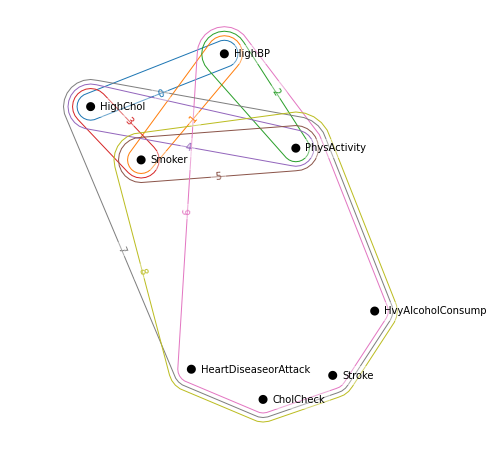

In [13]:
h=hnx.Hypergraph(new_dict)
hnx.draw(h)

In [14]:
h.nodes

EntitySet(:Nodes,['PhysActivity', 'HighChol', 'Stroke', 'HighBP', 'CholCheck', 'HvyAlcoholConsump', 'Smoker', 'HeartDiseaseorAttack'],{'weight': 1.0})

In [15]:
list(h.nodes)

['HighBP',
 'HighChol',
 'Smoker',
 'PhysActivity',
 'CholCheck',
 'Stroke',
 'HeartDiseaseorAttack',
 'HvyAlcoholConsump']

In [16]:
list(h.edges)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [17]:
h.edges

EntitySet(:Edges,[0, 1, 2, 3, 4, 5, 6, 7, 8],{'weight': 1.0})

In [18]:
h.incidence_dict

{0: {'HighBP', 'HighChol'},
 1: {'HighBP', 'Smoker'},
 2: {'HighBP', 'PhysActivity'},
 3: {'HighChol', 'Smoker'},
 4: {'HighChol', 'PhysActivity'},
 5: {'PhysActivity', 'Smoker'},
 6: {'CholCheck',
  'HeartDiseaseorAttack',
  'HighBP',
  'HvyAlcoholConsump',
  'PhysActivity',
  'Stroke'},
 7: {'CholCheck',
  'HeartDiseaseorAttack',
  'HighChol',
  'HvyAlcoholConsump',
  'PhysActivity',
  'Stroke'},
 8: {'CholCheck',
  'HeartDiseaseorAttack',
  'HvyAlcoholConsump',
  'PhysActivity',
  'Smoker',
  'Stroke'}}

In [19]:
import hypernetx as hnx
# Create hypergraph from sets in new_dict
h = hnx.Hypergraph.from_sets(new_dict)
# Extract nodes and edges
nodes_to_idx = list(h.nodes)
edges_to_idx = list(h.edges)


In [20]:
# Create an empty incidence matrix 
incidence_matrix = np.zeros((8, 9), dtype=int)

# Fill in the incidence matrix
for edge, idx in edge_to_idx.items():
    for vertex in edge:
        incidence_matrix[vertex_to_idx[vertex], idx] = 1
print(incidence_matrix)


[[1 1 1 0 0 0 1 0 0]
 [1 0 0 1 1 0 0 1 0]
 [0 1 0 1 0 1 0 0 1]
 [0 0 1 0 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]]


In [21]:
incidence_matrix_transpose = np.transpose(incidence_matrix)
print(incidence_matrix_transpose)

[[1 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [1 0 0 1 1 1 1 1]
 [0 1 0 1 1 1 1 1]
 [0 0 1 1 1 1 1 1]]


In [22]:
import numpy as np
num_edges = len(edge_to_idx)
# Create an empty weight matrix with num_edges rows and num_edges columns
weight_matrix = np.zeros((num_edges, num_edges), dtype=float)
# Fill in the diagonal with the weights of the edges
for idx, weight in enumerate(weights):
    weight_matrix[idx, idx] = weight
print(weight_matrix)


[[0.99382 0.      0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.995   0.      0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.90678 0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.99516 0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.90651 0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.89975 0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.80497 0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.88365 0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.      0.85485]]


In [23]:
adjacent_matrix = np.dot(incidence_matrix, np.dot(weight_matrix, incidence_matrix_transpose))
print(adjacent_matrix)

[[3.70057 0.99382 0.995   1.71175 0.80497 0.80497 0.80497 0.80497]
 [0.99382 3.77914 0.99516 1.79016 0.88365 0.88365 0.88365 0.88365]
 [0.995   0.99516 3.74476 1.7546  0.85485 0.85485 0.85485 0.85485]
 [1.71175 1.79016 1.7546  5.25651 2.54347 2.54347 2.54347 2.54347]
 [0.80497 0.88365 0.85485 2.54347 2.54347 2.54347 2.54347 2.54347]
 [0.80497 0.88365 0.85485 2.54347 2.54347 2.54347 2.54347 2.54347]
 [0.80497 0.88365 0.85485 2.54347 2.54347 2.54347 2.54347 2.54347]
 [0.80497 0.88365 0.85485 2.54347 2.54347 2.54347 2.54347 2.54347]]


In [24]:
import numpy as np
from sklearn.cluster import KMeans
def CLGA(adj, k, max_iter=100, tol=1e-6):
    n = adj.shape[0]    
    # Initialize B using K-means clustering
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(adj)
    B = kmeans.cluster_centers_
    B = B / np.linalg.norm(B, axis=1, keepdims=True)
       # Initialize C using K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(adj.T)
    C = kmeans.cluster_centers_
    C = C / np.linalg.norm(C, axis=1, keepdims=True)
    C = C.T    
    for i in range(max_iter):
        # Update B
        for h in range(n):
            error = np.zeros(k)
            for p in range(k):
                error[p] = np.linalg.norm(adj[h,:] - B[:,p].dot(C[p,:]))**2
            p_star = np.argmin(error)
            Chp = np.zeros(k)
            Chp[p_star] = 1
            B[h,:] = Chp          
        # Update C
        B_T = B.T
        regularization = 1e-6 * np.identity(k)
        C = np.linalg.inv(B_T.dot(B) + regularization).dot(B_T.dot(adj))
        
        # Check stopping criterion
        if np.linalg.norm(adj - B.dot(C.T)) < tol:
            break  
    # Generate partition membership matrix and feature cluster
    partition_membership = np.zeros((n, k))
    for i in range(n):
        partition_membership[i, np.argmax(B[i,:])] = 1
    feature_cluster = np.argmax(C, axis=0) 
    return partition_membership, feature_cluster

In [25]:
partition_membership, feature_cluster=CLGA(adjacent_matrix,8,max_iter=100,tol=1e-6)

C:\Users\sephy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sephy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sephy\AppData\Local\Temp/ipykernel_12464/2057044898.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(adj)
C:\Users\sephy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sephy\anaconda3\lib\

In [26]:
partition_membership

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.]])

In [27]:
feature_cluster

array([0, 1, 1, 0, 3, 3, 3, 3], dtype=int64)

In [28]:
partition_matrix = np.matrix(partition_membership.astype(int))

print(partition_matrix)

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]


In [29]:
feature_matrix = selected_features.values

In [30]:
feature_matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
#optimal feature subset generation
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

def feature_selection(X, y, clusters,feature_names, n_components=1, n_features=1, scoring_func=None):
    if scoring_func is None:
        scoring_func = SVC(kernel='linear')
        print(scoring_func)
    # Initialize a list to store the selected features
    selected_features = []

    # Loop through each feature cluster
    for cluster in clusters:
        # Ensure that the cluster is a 2D array
        cluster = np.array(cluster)
        if cluster.ndim == 1:
            cluster = cluster.reshape(-1, 1)
        # Dimensionality reduction for each cluster using PCA
        pca = PCA(n_components=n_components)
        X_cluster = X[:, cluster]
        X_cluster = X_cluster.reshape(-1, 1)
        X_reduced = pca.fit_transform(X_cluster)


        # Initialize the SFS object
        sfs = SFS(estimator=scoring_func, k_features=n_features, forward=True, floating=False)

        # Fit the SFS object to the reduced data
        sfs.fit(X_reduced, y)

        # Get the selected features
        selected = [cluster.flatten()[sfs.k_feature_idx_]]


        # Add the selected features to the list of selected features
        if selected[0] not in selected_features:
            selected_features.extend(selected)
        
    selected_feature_names = [feature_names[idx] for idx in selected_features]
    print("Selected Features:", selected_feature_names)
    return selected_features,scoring_func


In [32]:
selected_features,scoring_func = feature_selection(feature_matrix, y, feature_clusters,feature_names, n_components=1, n_features=1, scoring_func=SVC(kernel='linear'))

Selected Features: ['HighBP', 'HighChol', 'PhysActivity']


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Calculate the accuracy, precision, recall, and F1 score of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 87.469


C:\Users\sephy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
import pandas as pd
import statsmodels.api as sm
# Fit the logistic regression model
X = sm.add_constant(X)  # Add a constant term to the predictors
model = sm.Logit(y, X).fit()
# Get the odds ratios and p-values of each predictor
params = model.params[1:]
odds_ratios = np.exp(params)
p_values = model.pvalues[1:]
results_df = pd.DataFrame({'Odds Ratio': odds_ratios, 'P-value': p_values})
sorted_df = results_df.sort_values(by='P-value')
results_df.index = X.columns[1:]
print(results_df)
# Select only the features with p-values below a certain threshold (e.g. 0.05)
selected_features = sorted_df[sorted_df['P-value'] < 0.05].index
print(selected_features.tolist())

Optimization terminated successfully.
         Current function value: 0.345285
         Iterations 7
                      Odds Ratio        P-value
HighBP                  4.043322  3.644779e-267
HighChol                1.960396   2.098943e-74
CholCheck               2.668665   4.653556e-08
Smoker                  1.079398   2.931358e-02
Stroke                  1.630469   1.959760e-13
HeartDiseaseorAttack    1.841293   6.159691e-37
PhysActivity            0.930817   7.954153e-02
HvyAlcoholConsump       0.941388   4.249195e-01
['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke', 'CholCheck', 'Smoker']


C:\Users\sephy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",accuracy*100)

Accuracy: 84.132
